# Ejemplo de CNN 2D en la base de datos cifar100

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [ ]:
# descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [ ]:
# Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape)

(50000, 32, 32, 3)


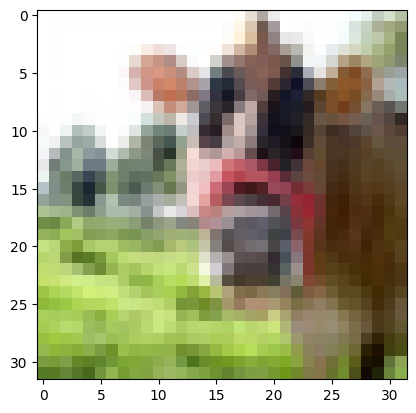

In [ ]:
import matplotlib.pyplot as plt

# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")

In [ ]:
# one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
y_train.shape

(50000, 100)

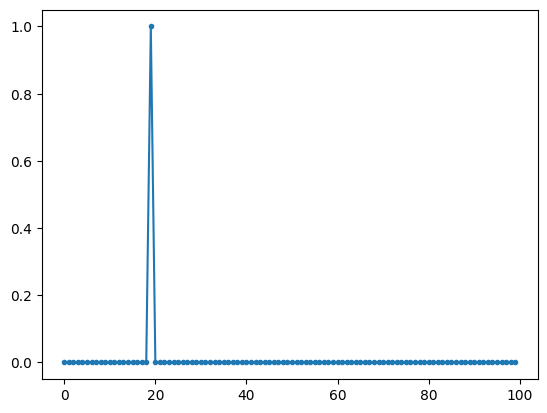

In [ ]:
plt.plot(y_train[0,:],'.-')

Modelo

In [ ]:
# Hacemos un modelo con varias capas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras import regularizers

#crear modelo
model = Sequential()

#Vamos añadiendo capas
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3),
                activity_regularizer=regularizers.l1(0.00001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.00001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(16, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.00001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(16, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.00001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

In [ ]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_47 (Ba  (None, 30, 30, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_47 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_48 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 batch_normalization_48 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_48 (Dropout)        (None, 28, 28, 32)      

In [ ]:
# Vamos a usar el callback de earlystopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.001)

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.3, epochs=10, callbacks=[early_stopping])

Epoch 1/10
1094/1094 [==============================] - 15s 12ms/step - loss: 4.9081 - accuracy: 0.0911 - val_loss: 3.9705 - val_accuracy: 0.1454
Epoch 2/10
1094/1094 [==============================] - 12s 11ms/step - loss: 3.5640 - accuracy: 0.2074 - val_loss: 3.5363 - val_accuracy: 0.2163
Epoch 3/10
1094/1094 [==============================] - 12s 11ms/step - loss: 3.2325 - accuracy: 0.2659 - val_loss: 4.0480 - val_accuracy: 0.1587
Epoch 4/10
1094/1094 [==============================] - 11s 10ms/step - loss: 2.9806 - accuracy: 0.3130 - val_loss: 3.2874 - val_accuracy: 0.2608
Epoch 5/10
1094/1094 [==============================] - 10s 9ms/step - loss: 2.7653 - accuracy: 0.3554 - val_loss: 3.4248 - val_accuracy: 0.2495
Epoch 6/10
1094/1094 [==============================] - 12s 11ms/step - loss: 2.5673 - accuracy: 0.3953 - val_loss: 4.1095 - val_accuracy: 0.2009
Epoch 7/10
1094/1094 [==============================] - 11s 10ms/step - loss: 2.3948 - accuracy: 0.4345 - val_loss: 3.5204 - 

In [ ]:
# Evaluamos el modelo
score = model.evaluate(X_test,y_test)
score

313/313 [==============================] - 1s 4ms/step - loss: 3.6302 - accuracy: 0.2672


[3.630185127258301, 0.2671999931335449]

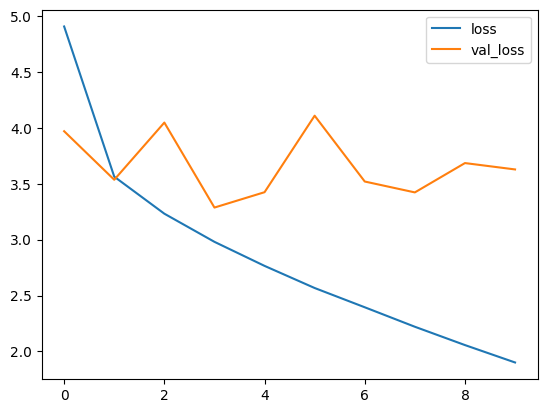

In [ ]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()


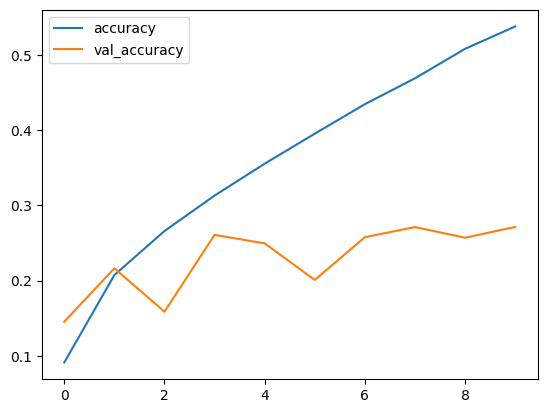

In [ ]:
# Ploteamos la evolucion del accuracy durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()


In [ ]:
# Predecimos sobre test
preds_test = model.predict(X_test)
preds_test.shape

313/313 [==============================] - 2s 3ms/step


(10000, 100)

63


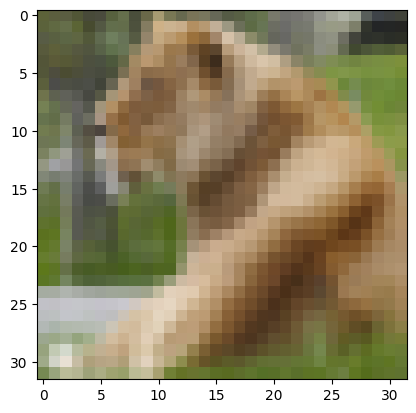

In [ ]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 2990
# Mostramos la imagen
plt.imshow(X_test[idx_mostrar,:,:,:])
# Mostramos las probabilidades que da el modelo a cada clase
print(np.argmax(preds_test[idx_mostrar]))